<a href="https://colab.research.google.com/github/caramelpopcornKHU/tensorflow/blob/main/CNN%EA%B8%B0%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

Exception ignored in: <function _xla_gc_callback at 0x7f4d3d2e99e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


In [2]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwarg):
        super().__init__(**kwarg)

        self.conv2D = tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', strides= 3)
        self.conv2D_2 = tf.keras.layers.Conv2D(filters=40, kernel_size=(3,3), padding='same', strides= 2)
        self.MaxPool2D = tf.keras.layers.MaxPool2D(pool_size=(2,2))

        # Create two separate BatchNormalization instances
        self.BatchNormalization_1 = tf.keras.layers.BatchNormalization()
        self.BatchNormalization_2 = tf.keras.layers.BatchNormalization()



        self.Dropout = tf.keras.layers.Dropout(rate=0.5)
        self.activation = tf.keras.layers.Activation('relu')

        self.flatten = tf.keras.layers.Flatten()
        self.Dense = tf.keras.layers.Dense(units=64, activation='relu')
        self.Dense2 = tf.keras.layers.Dense(units=10, activation='softmax')

    def call(self, inputs):
        #1번 합성곱 연산
        x = self.conv2D(inputs)
        x = self.MaxPool2D(x)
        x = self.BatchNormalization_1(x)
        x = self.Dropout(x)
        x = self.activation(x)

        #2번 합성곱 연산
        x = self.conv2D_2(x)
        x = self.BatchNormalization_2(x)
        x = self.Dropout(x)
        x = self.activation(x)
        x = self.MaxPool2D(x)

        x = self.flatten(x)
        x = self.Dense(x)
        x = self.Dense2(x)
        return x


In [16]:
class MyModel2(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        # 첫 번째 CONV → RELU → BN → CONV → RELU → BN → POOL → Dropout
        self.conv1_1 = tf.keras.layers.Conv2D(32, (3, 3), padding="same")
        self.relu1_1 = tf.keras.layers.Activation("relu")
        self.bn1_1 = tf.keras.layers.BatchNormalization(axis=3)

        self.conv1_2 = tf.keras.layers.Conv2D(32, (3, 3), padding="same")
        self.relu1_2 = tf.keras.layers.Activation("relu")
        self.bn1_2 = tf.keras.layers.BatchNormalization(axis=3)

        self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop1 = tf.keras.layers.Dropout(0.25)

        # 두 번째 CONV → RELU → BN → CONV → RELU → BN → POOL → Dropout
        self.conv2_1 = tf.keras.layers.Conv2D(64, (3, 3), padding="same")
        self.relu2_1 = tf.keras.layers.Activation("relu")
        self.bn2_1 = tf.keras.layers.BatchNormalization(axis=3)

        self.conv2_2 = tf.keras.layers.Conv2D(64, (3, 3), padding="same")
        self.relu2_2 = tf.keras.layers.Activation("relu")
        self.bn2_2 = tf.keras.layers.BatchNormalization(axis=3)

        self.pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop2 = tf.keras.layers.Dropout(0.25)

        # FC → RELU → BN → Dropout
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(512)
        self.relu_fc1 = tf.keras.layers.Activation("relu")
        self.bn_fc1 = tf.keras.layers.BatchNormalization()
        self.drop_fc1 = tf.keras.layers.Dropout(0.5)

        # 최종 Softmax 출력
        self.output_layer = tf.keras.layers.Dense(10)
        self.softmax = tf.keras.layers.Activation("softmax")

    def call(self, inputs):
        x = self.conv1_1(inputs)
        x = self.relu1_1(x)
        x = self.bn1_1(x)
        x = self.conv1_2(x)
        x = self.relu1_2(x)
        x = self.bn1_2(x)
        x = self.pool1(x)
        x = self.drop1(x)

        x = self.conv2_1(x)
        x = self.relu2_1(x)
        x = self.bn2_1(x)
        x = self.conv2_2(x)
        x = self.relu2_2(x)
        x = self.bn2_2(x)
        x = self.pool2(x)
        x = self.drop2(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu_fc1(x)
        x = self.bn_fc1(x)
        x = self.drop_fc1(x)

        x = self.output_layer(x)
        return self.softmax(x)


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

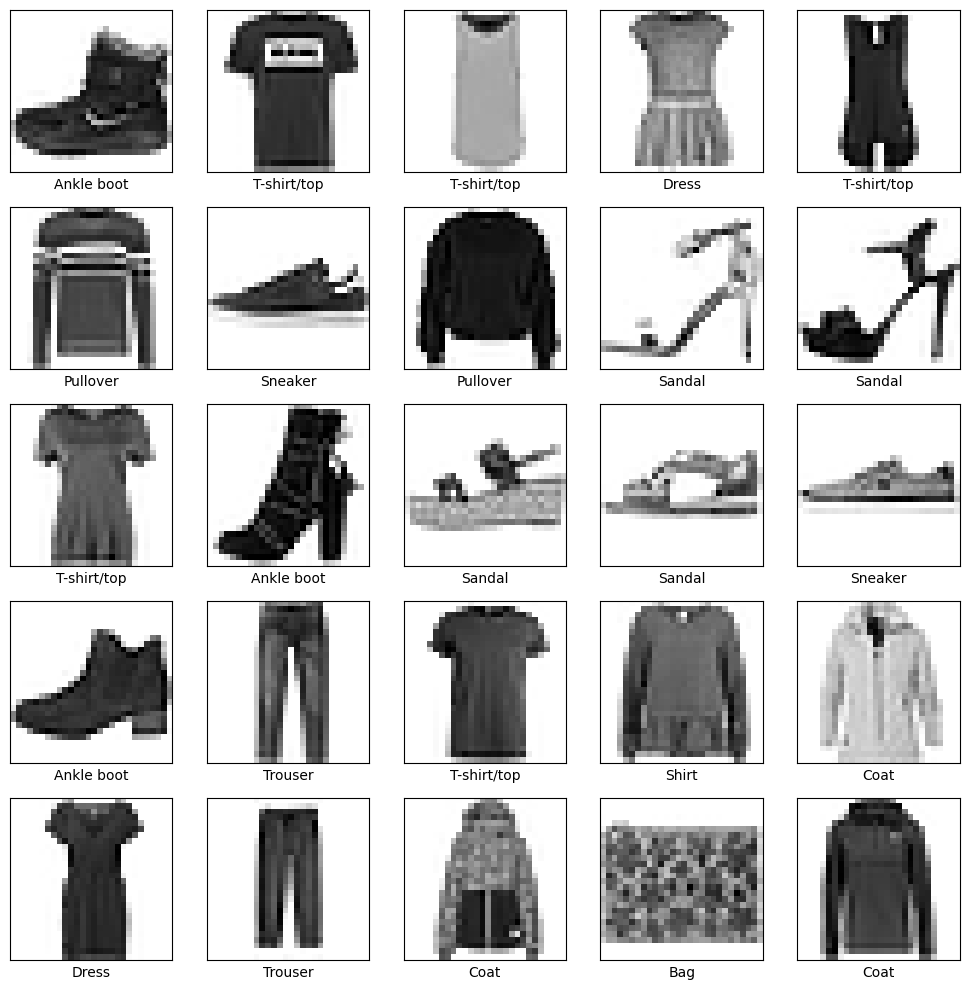

In [26]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show()

In [4]:
# Reshape train_images and test_images to include the channel dimension
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Also, it's generally good practice to normalize image data to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# imageClassModel = MyModel(name = 'image분류모델') # Original line with invalid name
imageClassModel = MyModel(name = 'image_classification_model') # Changed to a valid name

In [6]:
imageClassModel.summary()

Model: "image_classification_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
imageClassModel.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [8]:
imageClassModel.fit(train_images, train_labels, epochs=100,validation_split=0.2)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6613 - loss: 0.9622 - val_accuracy: 0.8191 - val_loss: 0.5007
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8218 - loss: 0.4827 - val_accuracy: 0.8398 - val_loss: 0.4357
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8431 - loss: 0.4247 - val_accuracy: 0.8369 - val_loss: 0.4472
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8547 - loss: 0.3978 - val_accuracy: 0.8502 - val_loss: 0.3973
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8592 - loss: 0.3742 - val_accuracy: 0.8553 - val_loss: 0.3910
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8643 - loss: 0.3681 - val_accuracy: 0.8647 - val_loss: 0.3672
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8696 - loss: 0.3508 - val_accuracy: 0.8567 - val_loss: 0.3850
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8726 - los

In [9]:
test_loss, test_acc = imageClassModel.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8707 - loss: 0.5344


In [10]:
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.8701


In [11]:
imageClassModel.summary()

Model: "image_classification_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (32, 10, 10, 16)       │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 3, 3, 40)         │         5,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (32, 5, 5, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (32, 3, 3, 40)         │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 40)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,920 (112.97 KB)

 Trainable params: 9,602 (37.51 KB)

 Non-trainable params: 112 (448.00 B)

 Optimizer params: 19,206 (75.03 KB)

In [17]:
imageClassModel2 = MyModel2(name = 'vgg')

In [18]:
imageClassModel2.summary()

Model: "vgg"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
imageClassModel2.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [20]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
imageClassModel2.fit(train_images, train_labels, epochs=80,validation_split=0.2)

Epoch 1/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8035 - loss: 0.5342 - val_accuracy: 0.9009 - val_loss: 0.2624
Epoch 2/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9172 - loss: 0.2253 - val_accuracy: 0.9162 - val_loss: 0.2274
Epoch 3/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9369 - loss: 0.1697 - val_accuracy: 0.9232 - val_loss: 0.2151
Epoch 4/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9546 - loss: 0.1237 - val_accuracy: 0.9243 - val_loss: 0.2577
Epoch 5/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9667 - loss: 0.0899 - val_accuracy: 0.9197 - val_loss: 0.2761
Epoch 6/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9763 - loss: 0.0641 - val_accuracy: 0.9233 - val_loss: 0.2791
Epoch 7/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9821 - loss: 0.0512 - val_accuracy: 0.9210 - val_loss: 0.3306
Epoch 8/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9861 - loss: 0.0399 

In [22]:
test_loss2, test_acc2 = imageClassModel2.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9215 - loss: 1.0408


In [23]:
print(f"Test accuracy: {test_acc2:.4f}")

Test accuracy: 0.9230
